In [1]:

library(randomForest)
library(ggplot2)
library(ggcorrplot)
library(InformationValue)
library(caTools)
library(class)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'ggplot2' was built under R version 3.5.2"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Warning message:
"package 'ggcorrplot' was built under R version 3.5.2"Warning message:
"package 'InformationValue' was built under R version 3.5.2"Warning message:
"package 'caTools' was built under R version 3.5.2"Warning message:
"package 'class' was built under R version 3.5.2"

In [2]:
data <- read.delim("data.txt", sep=",", header = F) 
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [3]:
#Assigning names to columns.
colnames(data) <- c('Gender', 'Age','Debt','Maritalstatus','BankCustomer','Education','Ethnicity','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','USCitizen','Zip','Income','CardApproved')
head(data)

Gender,Age,Debt,Maritalstatus,BankCustomer,Education,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,USCitizen,Zip,Income,CardApproved
b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [4]:
#Viewing data type of each column:
sapply(data, class)

Gender            Age           Debt  Maritalstatus   BankCustomer 
      "factor"       "factor"      "numeric"       "factor"       "factor" 
     Education      Ethnicity  YearsEmployed   PriorDefault       Employed 
      "factor"       "factor"      "numeric"       "factor"       "factor" 
   CreditScore DriversLicense      USCitizen            Zip         Income 
     "integer"       "factor"       "factor"       "factor"      "integer" 
  CardApproved 
      "factor"

In [5]:
#changing '+' and '-' in CardApproved column to '1' and '0' respectively.
data$CardApproved <- as.character(data$CardApproved)
data$CardApproved[data$CardApproved=='-'] <- '0'
data$CardApproved[data$CardApproved=='+'] <- '1'
data$CardApproved <- as.factor(data$CardApproved)

Working on Age feature 

Following 5 steps are to replace missing values in Age with suitable values found using linear regression


In [6]:
#1 changing the Age column from factor to numeric
data$Age <- as.numeric(levels(data$Age))[data$Age]


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [7]:
#2 subsetting only the numeric columns of data. i.e age, debt, yearsEmployed, creditscore and income columns
 
data_num <- names(data)[which(sapply(data, is.numeric))]

cordata <- data[,data_num]
summary(cordata)

      Age             Debt        YearsEmployed     CreditScore  
 Min.   :13.75   Min.   : 0.000   Min.   : 0.000   Min.   : 0.0  
 1st Qu.:22.60   1st Qu.: 1.000   1st Qu.: 0.165   1st Qu.: 0.0  
 Median :28.46   Median : 2.750   Median : 1.000   Median : 0.0  
 Mean   :31.57   Mean   : 4.759   Mean   : 2.223   Mean   : 2.4  
 3rd Qu.:38.23   3rd Qu.: 7.207   3rd Qu.: 2.625   3rd Qu.: 3.0  
 Max.   :80.25   Max.   :28.000   Max.   :28.500   Max.   :67.0  
 NA's   :12                                                      
     Income        
 Min.   :     0.0  
 1st Qu.:     0.0  
 Median :     5.0  
 Mean   :  1017.4  
 3rd Qu.:   395.5  
 Max.   :100000.0  
                   

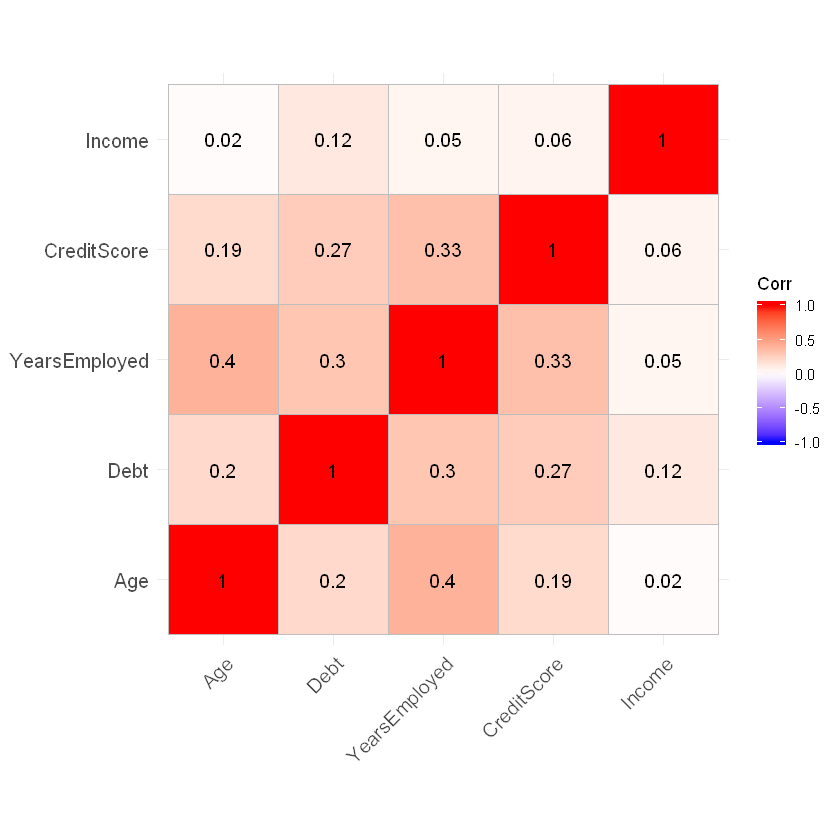

In [8]:
#3 finding correlations among the above mentioned columns

Agecor <- cor(na.omit(cordata))
ggcorrplot(Agecor, lab = TRUE)


We observed that Age and YearsEmployed have a better correlation than that of Age with any other feature.


In [9]:
#4 Thus we use linear regression model between Age and YearsEmployed
cordata.lm <- lm(formula = Age ~ YearsEmployed, data = cordata)
cordata.lm



Call:
lm(formula = Age ~ YearsEmployed, data = cordata)

Coefficients:
  (Intercept)  YearsEmployed  
       28.448          1.412  


In [10]:
#5 Finally, we predict the missing values in Age.
pred_age <- predict.lm(cordata.lm , data = cordata$YearsEmployed)
cordata$Age[is.na(cordata$Age)] <- pred_age[is.na(cordata$Age)]

data$Age <- cordata$Age


integer(0)

In [11]:
# Now we carry out normalization of Age. 

data$AgeNormal <- scale(data$Age)


We can also carry out normalization using the method below. Both give same results.
data$AgeNormal <- data$Age - mean(data$Age)
data$AgeNormal <- data$AgeNormal/ sd(data$Age)


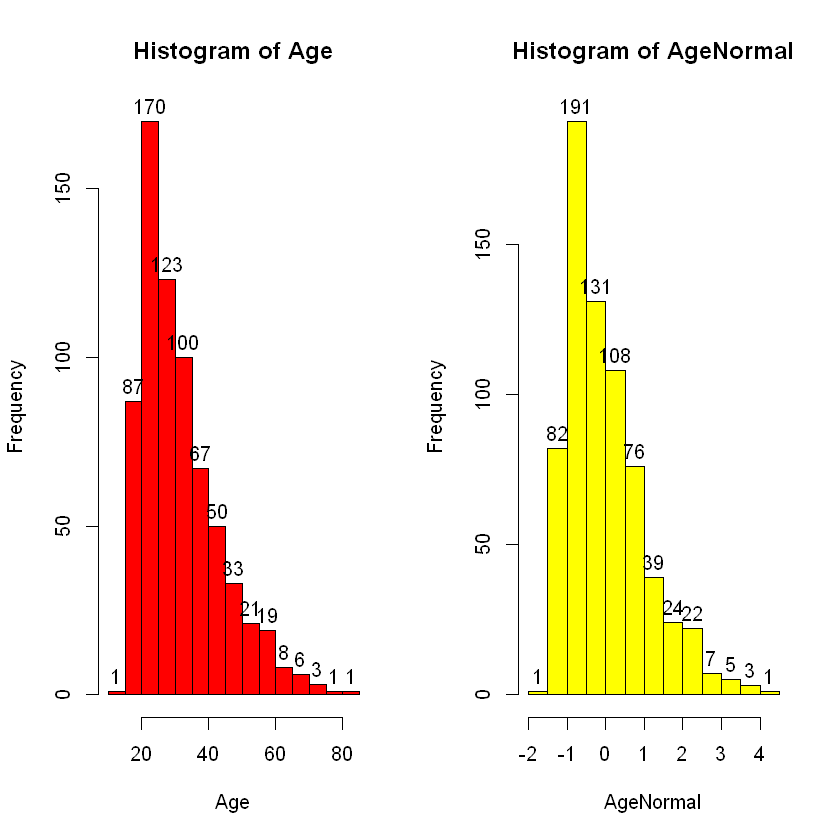

In [12]:
#Next, we plot the histogram of unnormalized Age alongside normalized Age

par(mfrow=c(1,2))
hist(data$Age, main = 'Histogram of Age', xlab = 'Age', col = 'red', labels = TRUE)
hist(data$AgeNormal, main = 'Histogram of AgeNormal', xlab = 'AgeNormal', col = 'yellow', labels = TRUE)


One thing to note is that the data is skewed to the right because the tail is longer.


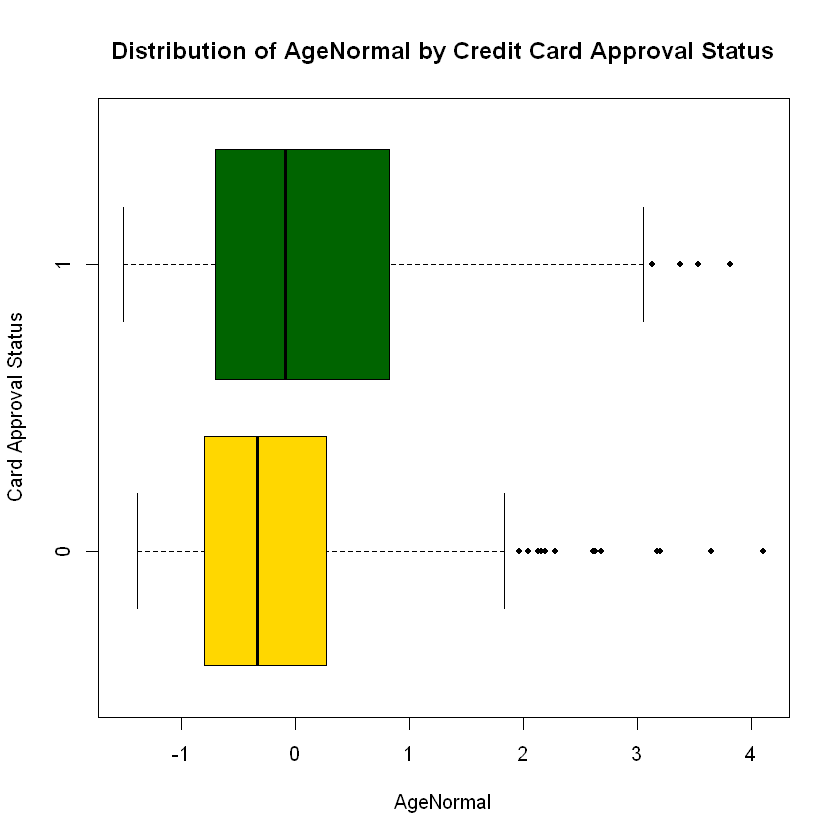

In [13]:
#Plotting the boxplot
par(mfrow=c(1,1))
boxplot(AgeNormal ~ CardApproved, data=data, horizontal = TRUE,
        col=c("gold","darkgreen"), outcex=1, outpch=20, xlab = 'AgeNormal', ylab = 'Card Approval Status', main = 'Distribution of AgeNormal by Credit Card Approval Status') 


In [14]:
#Now we carry out the same steps for the remaining numeric features.

data$DebtNormal <- scale(data$Debt)
data$YearsEmployedNormal <- scale(data$YearsEmployed)
data$CreditScoreNormal <- scale(data$CreditScore)
data$IncomeNormal <- scale(data$Income)


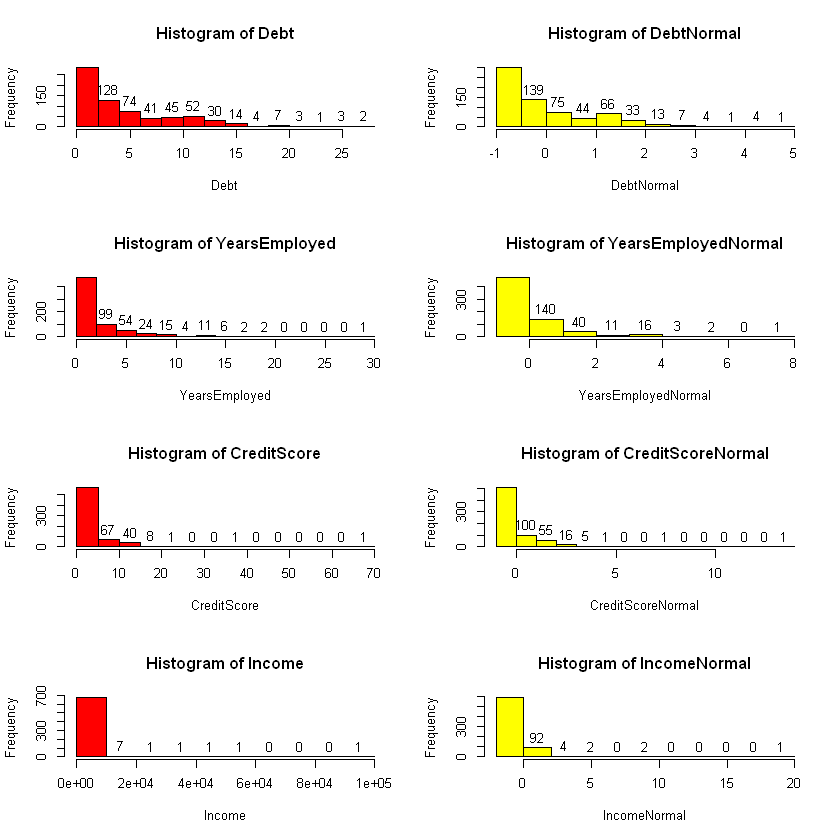

In [15]:
#Histograms :

par(mfrow=c(4,2))
hist(data$Debt, main = 'Histogram of Debt', xlab = 'Debt', col = 'red', labels = TRUE)
hist(data$DebtNormal, main = 'Histogram of DebtNormal', xlab = 'DebtNormal', col = 'yellow', labels = TRUE)

hist(data$YearsEmployed, main = 'Histogram of YearsEmployed', xlab = 'YearsEmployed', col = 'red', labels = TRUE)
hist(data$YearsEmployedNormal, main = 'Histogram of YearsEmployedNormal', xlab = 'YearsEmployedNormal', col = 'yellow', labels = TRUE)

hist(data$CreditScore, main = 'Histogram of CreditScore', xlab = 'CreditScore', col = 'red', labels = TRUE)
hist(data$CreditScoreNormal, main = 'Histogram of CreditScoreNormal', xlab = 'CreditScoreNormal', col = 'yellow', labels = TRUE)

hist(data$Income, main = 'Histogram of Income', xlab = 'Income', col = 'red', labels = TRUE)
hist(data$IncomeNormal, main = 'Histogram of IncomeNormal', xlab = 'IncomeNormal', col = 'yellow', labels = TRUE)


After observing the histograms we can see that the data is skewed to the right.
This indicates the median is less than the mean. 


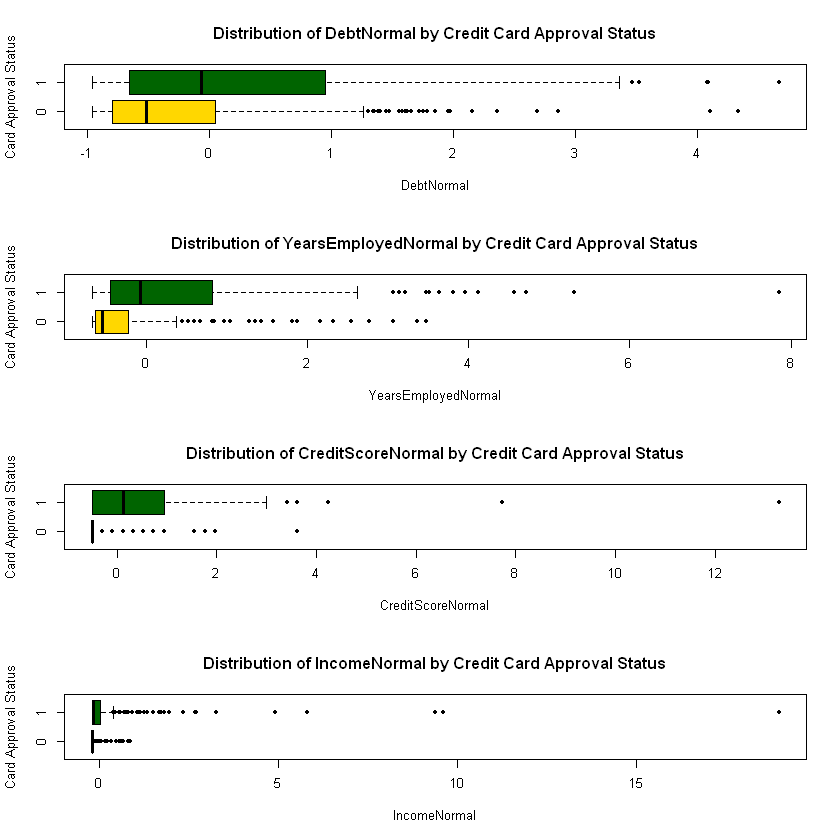

In [17]:
#Boxplots:

par(mfrow=c(4,1))

boxplot(DebtNormal ~ CardApproved , data=data, horizontal = TRUE,  col=c("gold", "darkgreen"), 
        outcex=1, outpch=20, xlab = 'DebtNormal', ylab = 'Card Approval Status', main = 'Distribution of DebtNormal by Credit Card Approval Status')


boxplot(YearsEmployedNormal ~ CardApproved, data=data, horizontal = TRUE,  col=c("gold", "darkgreen"), 
        outcex=1, outpch=20, xlab = 'YearsEmployedNormal', ylab = 'Card Approval Status', main = 'Distribution of YearsEmployedNormal by Credit Card Approval Status')

boxplot(CreditScoreNormal  ~ CardApproved , data=data, horizontal = TRUE,  col=c("gold", "darkgreen"), 
        outcex=1, outpch=20, xlab = 'CreditScoreNormal', ylab = 'Card Approval Status', main = 'Distribution of CreditScoreNormal by Credit Card Approval Status')



boxplot(IncomeNormal ~ CardApproved, data=data, horizontal = TRUE,  col=c("gold", "darkgreen"), 
        outcex=1, outpch=20, xlab = 'IncomeNormal', ylab = 'Card Approval Status', main = 'Distribution of IncomeNormal by Credit Card Approval Status')


Here, we can see the distribution is different between the variables. Variance of IncomeNormal is the  least as the boxes are seen to be tightly grouped about the mean.

Logarithmic transformation of the data would be more preferable.


In [18]:
#Here, we take log of data first and then normalize :

data$AgeLogN <- scale(log(data$Age + 1))
data$DebtLogN <- scale(log(data$Debt + 1))
data$YearsEmployedLogN <- scale(log(data$YearsEmployed + 1))
data$CreditScoreLogN <- scale(log(data$CreditScore + 1))
data$IncomeLogN <- scale(log(data$Income + 1))


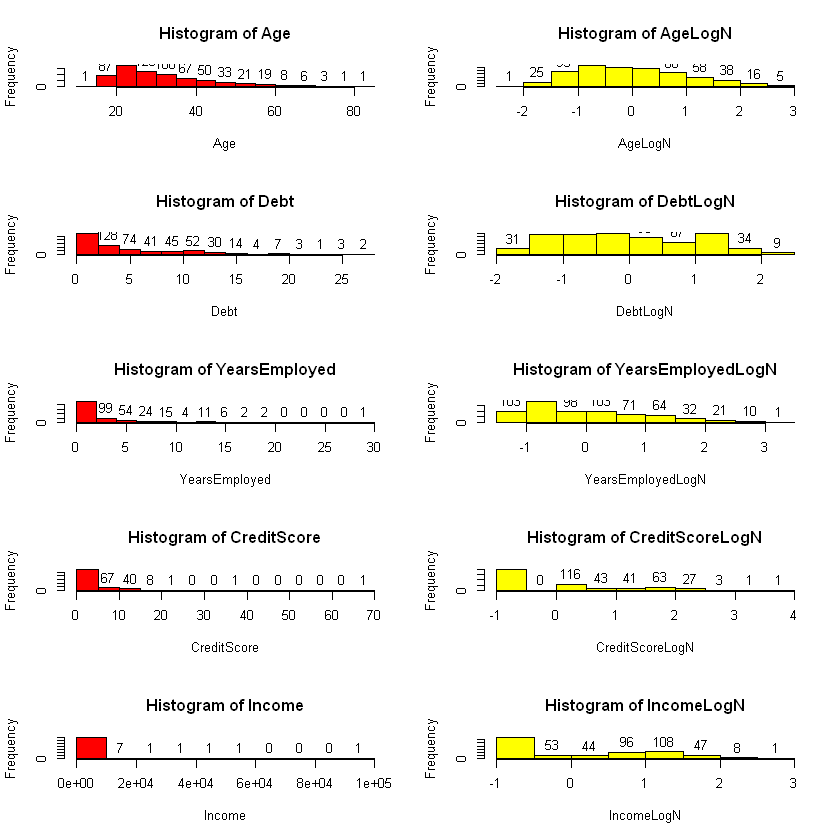

In [19]:
#Again, we plot histograms and boxplots of the modified values.

#Histograms :

par(mfrow=c(5,2))

hist(data$Age, main = 'Histogram of Age', xlab = 'Age', col = 'red', labels = TRUE)
hist(data$AgeLogN, main = 'Histogram of AgeLogN', xlab = 'AgeLogN', col = 'yellow', labels = TRUE)

hist(data$Debt, main = 'Histogram of Debt', xlab = 'Debt', col = 'red', labels = TRUE)
hist(data$DebtLogN, main = 'Histogram of DebtLogN', xlab = 'DebtLogN', col = 'yellow', labels = TRUE)

hist(data$YearsEmployed, main = 'Histogram of YearsEmployed', xlab = 'YearsEmployed', col = 'red', labels = TRUE)
hist(data$YearsEmployedLogN, main = 'Histogram of YearsEmployedLogN', xlab = 'YearsEmployedLogN', col = 'yellow', labels = TRUE)

hist(data$CreditScore, main = 'Histogram of CreditScore', xlab = 'CreditScore', col = 'red', labels = TRUE)
hist(data$CreditScoreLogN, main = 'Histogram of CreditScoreLogN', xlab = 'CreditScoreLogN', col = 'yellow', labels = TRUE)

hist(data$Income, main = 'Histogram of Income', xlab = 'Income', col = 'red', labels = TRUE)
hist(data$IncomeLogN, main = 'Histogram of IncomeLogN', xlab = 'IncomeLogN', col = 'yellow', labels = TRUE)


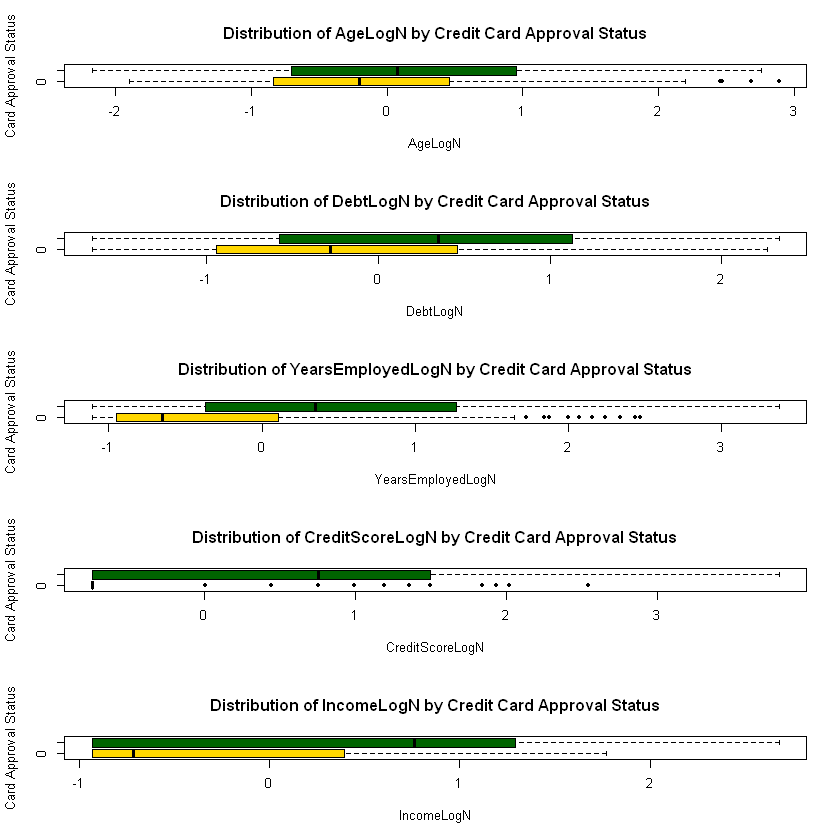

In [20]:
#Boxplots:

par(mfrow=c(5,1))

boxplot(AgeLogN ~ CardApproved, data=data, horizontal = TRUE,
        col=c("gold","darkgreen"), outcex=1, outpch=20, xlab = 'AgeLogN', ylab = 'Card Approval Status', main = 'Distribution of AgeLogN by Credit Card Approval Status') 


boxplot(DebtLogN ~ CardApproved , data=data, horizontal = TRUE,  col=c("gold", "darkgreen"), 
        outcex=1, outpch=20, xlab = 'DebtLogN', ylab = 'Card Approval Status', main = 'Distribution of DebtLogN by Credit Card Approval Status')


boxplot(YearsEmployedLogN ~ CardApproved, data=data, horizontal = TRUE,  col=c("gold", "darkgreen"), 
        outcex=1, outpch=20, xlab = 'YearsEmployedLogN', ylab = 'Card Approval Status', main = 'Distribution of YearsEmployedLogN by Credit Card Approval Status')

boxplot(CreditScoreLogN  ~ CardApproved , data=data, horizontal = TRUE,  col=c("gold", "darkgreen"), 
        outcex=1, outpch=20, xlab = 'CreditScoreLogN', ylab = 'Card Approval Status', main = 'Distribution of CreditScoreLogN by Credit Card Approval Status')

boxplot(IncomeLogN ~ CardApproved, data=data, horizontal = TRUE,  col=c("gold", "darkgreen"), 
        outcex=1, outpch=20, xlab = 'IncomeLogN', ylab = 'Card Approval Status', main = 'Distribution of IncomeLogN by Credit Card Approval Status')



The boxplots add more informational value now because for each dataset the mean of the approved applications 
is further distributed from the mean of those denied. 
This difference will help the classifier algorithm to distinguish between the values later.
We should specifically notice for the IncomeLogN and CreditScoreLogN variables that the applicants 
that did not receive credit card were still heavily skewed to the right when compared to those that were granted credit. 
This means that a low IncomeLog or CreditScoreLog score is likely a good predictor for making the application decision. 


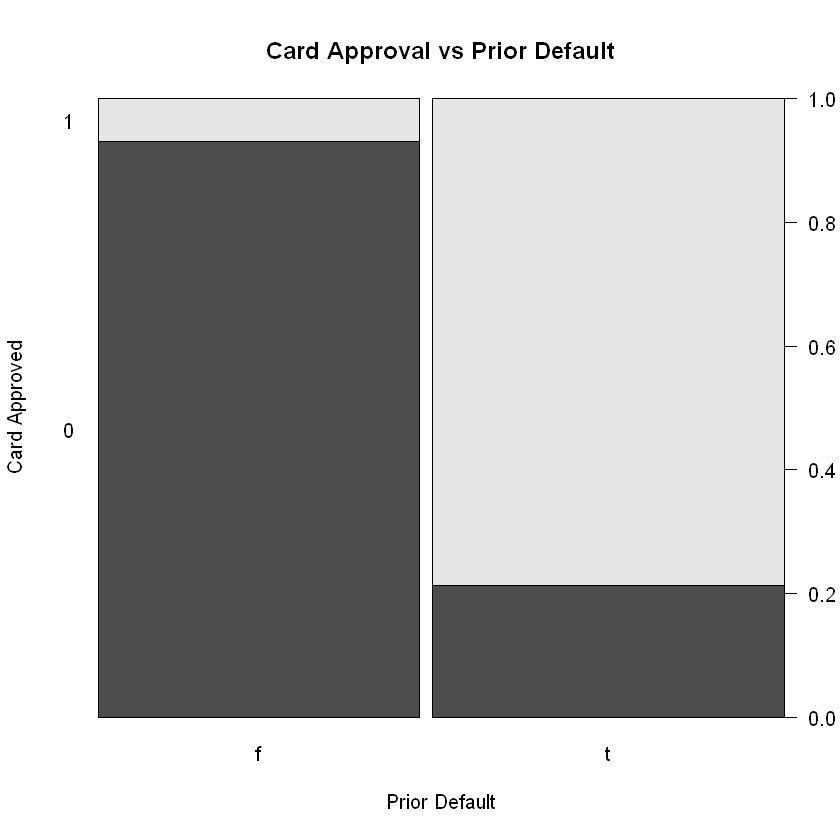

In [21]:
#NOW WORKING WITH CATEGORICAL VARIABLES

#1 PriorDefault

#We construct the bar plot
par(mfrow=c(1,1))
par(las=1)    # Orient all axis labels horizontally
par(mar=c(5, 4, 4, 2.2) + 0.1)    # Widen right margin slightly, to fit horizontal labels
plot(CardApproved ~ PriorDefault, data= data, main="Card Approval vs Prior Default",
     xlab="Prior Default", ylab="Card Approved")


Thus we can clearly see that priordefault has a significant effect on CardApproval


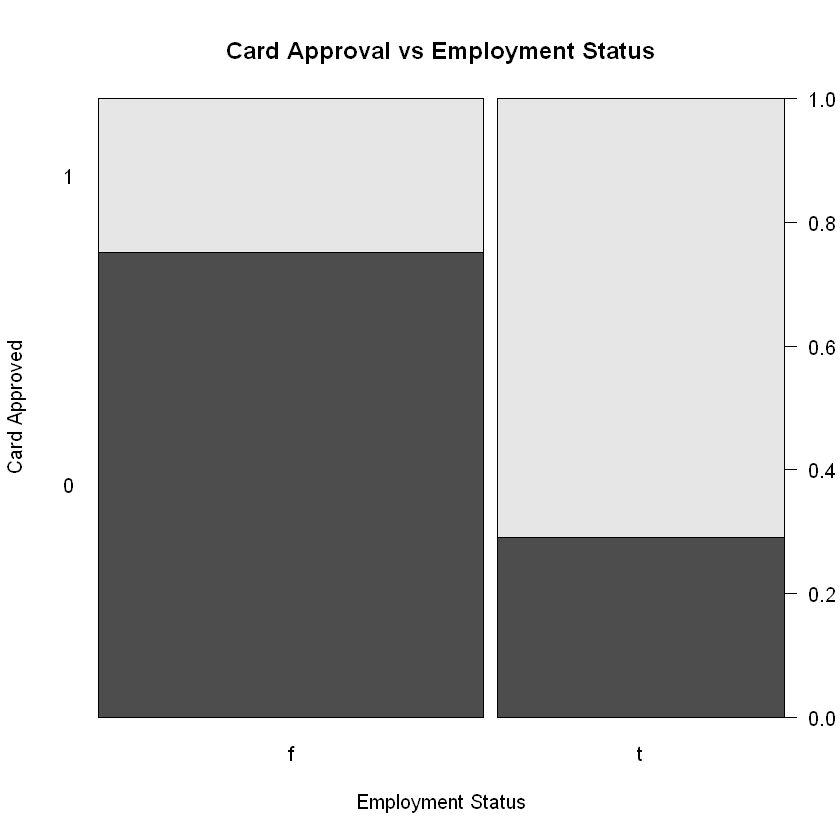

In [22]:
#2 Employment Status


par(las=1)    # Orient all axis labels horizontally
par(mar=c(5, 4, 4, 2.2) + 0.1)    # Widen right margin slightly, to fit horizontal labels
plot(CardApproved ~ Employed, data= data, main="Card Approval vs Employment Status",
     xlab="Employment Status", ylab="Card Approved")



In [23]:
#3 Gender

table(data$Gender) 



  ?   a   b 
 12 210 468 

In [24]:
#There are only 12 missing values in Gender. 
#For simplicity we replace them by the most recurring value in that column, i.e. 'b' 

data$Gender <- as.character(data$Gender)
data$Gender[data$Gender == '?'] <- 'b'
data$Gender <- as.factor(data$Gender)
table(data$Gender)


  a   b 
210 480 

Now that we have preprocessed the data, we begin with the modelling. 
First we try Logistic Regression.

In [25]:
#Removing the norm columns 
data <- data[,-c(17:21)]

#Spliting the data into Training and Testing data
set.seed(1234)

split <- sample.split(data$CardApproved, SplitRatio = 0.75)
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)
table(training_set$CardApproved)  


  0   1 
287 230 

We can observe the CardApproval classes (1 , 0) are almost equally distributed.
In case the distrubtion was uneven, we could have used oversampling / undersamping / synthetic sampling techniques to make it even.


In [26]:
classifier1 <- glm(formula = CardApproved ~ AgeLogN + DebtLogN + YearsEmployedLogN + 
                     CreditScoreLogN + IncomeLogN, family = binomial, data = training_set)


prob_pred1 = predict(classifier1, type = 'response', newdata = training_set[-16])
y_pred1 = ifelse(prob_pred1 > 0.5, 1, 0)

# Making the Confusion Matrix
cm1 = table(training_set[,16], y_pred1 > 0.5)

summary(classifier1)
cm1


Call:
glm(formula = CardApproved ~ AgeLogN + DebtLogN + YearsEmployedLogN + 
    CreditScoreLogN + IncomeLogN, family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4489  -0.7597  -0.4665   0.6869   2.2710  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.206964   0.111721  -1.853 0.063953 .  
AgeLogN           -0.006249   0.117427  -0.053 0.957559    
DebtLogN           0.172087   0.112324   1.532 0.125508    
YearsEmployedLogN  0.765234   0.124943   6.125 9.09e-10 ***
CreditScoreLogN    0.980819   0.133211   7.363 1.80e-13 ***
IncomeLogN         0.446848   0.118527   3.770 0.000163 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 710.42  on 516  degrees of freedom
Residual deviance: 501.24  on 511  degrees of freedom
AIC: 513.24

Number of Fisher Scoring iterations: 5


   
    FALSE TRUE
  0   246   41
  1    74  156

In [27]:
classifier2 <- glm(formula = CardApproved ~ YearsEmployedLogN + 
                     CreditScoreLogN + IncomeLogN, family = binomial, data = training_set)

prob_pred2 = predict(classifier2, type = 'response', newdata = training_set[-16])
y_pred2 = ifelse(prob_pred2 > 0.5, 1, 0)

# Making the Confusion Matrix
cm2 = table(training_set[,16], y_pred2 > 0.5)
summary(classifier2)
cm2


Call:
glm(formula = CardApproved ~ YearsEmployedLogN + CreditScoreLogN + 
    IncomeLogN, family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4209  -0.7462  -0.4697   0.6973   2.1612  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.2070     0.1113  -1.861 0.062767 .  
YearsEmployedLogN   0.7872     0.1193   6.598 4.16e-11 ***
CreditScoreLogN     0.9910     0.1323   7.490 6.90e-14 ***
IncomeLogN          0.4522     0.1185   3.817 0.000135 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 710.42  on 516  degrees of freedom
Residual deviance: 503.59  on 513  degrees of freedom
AIC: 511.59

Number of Fisher Scoring iterations: 5


   
    FALSE TRUE
  0   244   43
  1    78  152

In [28]:
classifier3 <- glm(formula = CardApproved ~ PriorDefault + AgeLogN + DebtLogN + Employed +YearsEmployedLogN+
                     CreditScoreLogN + IncomeLogN, family = binomial, data = training_set)

prob_pred3 = predict(classifier3, type = 'response', newdata = training_set[-16])
y_pred3 = ifelse(prob_pred3 > 0.5, 1, 0)

# Making the Confusion Matrix
cm3 = table(training_set[,16], y_pred3 > 0.5)
summary(classifier3)
cm3



Call:
glm(formula = CardApproved ~ PriorDefault + AgeLogN + DebtLogN + 
    Employed + YearsEmployedLogN + CreditScoreLogN + IncomeLogN, 
    family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3923  -0.3689  -0.2277   0.4937   2.9091  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -2.32196    0.38567  -6.021 1.74e-09 ***
PriorDefaultt      3.49474    0.33925  10.301  < 2e-16 ***
AgeLogN           -0.19298    0.14461  -1.334 0.182048    
DebtLogN          -0.04101    0.14014  -0.293 0.769826    
Employedt         -0.17321    0.54528  -0.318 0.750746    
YearsEmployedLogN  0.46748    0.15136   3.089 0.002011 ** 
CreditScoreLogN    0.66172    0.30647   2.159 0.030838 *  
IncomeLogN         0.49681    0.15028   3.306 0.000946 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 710.42  on 5

   
    FALSE TRUE
  0   240   47
  1    25  205

In [30]:
classifier4 <- glm(formula = CardApproved ~ PriorDefault + YearsEmployedLogN+
                     CreditScoreLogN + IncomeLogN, family = binomial, data = training_set)

prob_pred4 = predict(classifier4, type = 'response', newdata = training_set[-16])
y_pred4 = ifelse(prob_pred4 > 0.5, 1, 0)

# Making the Confusion Matrix
cm4 = table(training_set[,16], y_pred4 > 0.5)
summary(classifier4)
cm4


Call:
glm(formula = CardApproved ~ PriorDefault + YearsEmployedLogN + 
    CreditScoreLogN + IncomeLogN, family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3467  -0.3650  -0.2285   0.4836   2.7281  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.3606     0.2850  -8.284  < 2e-16 ***
PriorDefaultt       3.4268     0.3303  10.376  < 2e-16 ***
YearsEmployedLogN   0.4135     0.1465   2.821 0.004782 ** 
CreditScoreLogN     0.5820     0.1633   3.565 0.000365 ***
IncomeLogN          0.4803     0.1494   3.214 0.001310 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 710.42  on 516  degrees of freedom
Residual deviance: 346.32  on 512  degrees of freedom
AIC: 356.32

Number of Fisher Scoring iterations: 5


   
    FALSE TRUE
  0   239   48
  1    25  205

In [31]:
#TEST 
#We compare two classifiers : classifier 3 and classifier 4

prob_predt3 = predict(classifier3, type = 'response', newdata = test_set[-16])
y_predt3 = ifelse(prob_predt3 > 0.5, 1, 0)

# Making the Confusion Matrix
cmt3 = table(test_set[,16], y_predt3 > 0.5)
cmt3

   
    FALSE TRUE
  0    82   14
  1    12   65

Here we have , 15.03% misclassification error. 

In [32]:
prob_predt4 = predict(classifier4, type = 'response', newdata = test_set[-16])
y_predt4 = ifelse(prob_predt4 > 0.5, 1, 0)

# Making the Confusion Matrix
cmt4 = table(test_set[,16], y_predt4 > 0.5)
cmt4

   
    FALSE TRUE
  0    85   11
  1    12   65

For classifier 4, we got misclassification error = 13.29%

Thus, we can say, even though the in training accuracy both classifiers was almost equal, classifier 4 is the better model which can be proved by comparing at the AIC values of both. Lower AIC indicates better modelling.

In [33]:
#Therefore for Logistic Regression, we can say Misclassification error is:

MisclassificationError_LR = (cmt4[1,2]+cmt4[2,1])/nrow(test_set)*100
MisclassificationError_LR 

[1] 13.2948

[1] 0.5526882

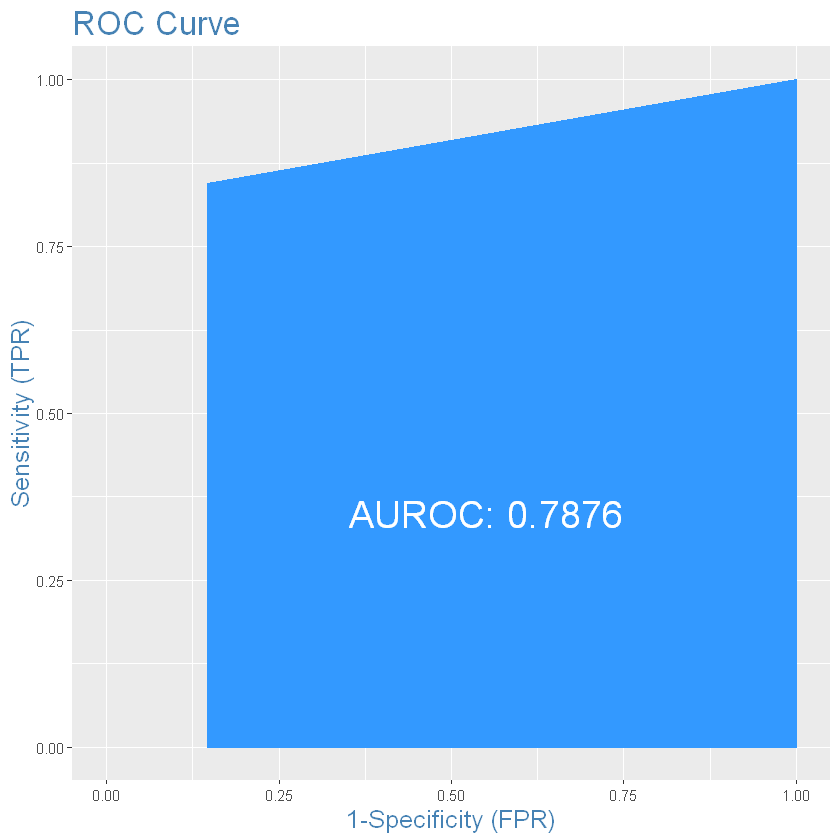

In [35]:
#find optimal threshold:
#for Classifier3
oc3 <- optimalCutoff(test_set$CardApproved, prob_predt3)[1] 
oc3

yp3 = ifelse(prob_predt3 > oc, 1, 0)

#roc.curve(test_set$CardApproved, yp3)
plotROC(test_set$CardApproved, yp3)


[1] 0.492441

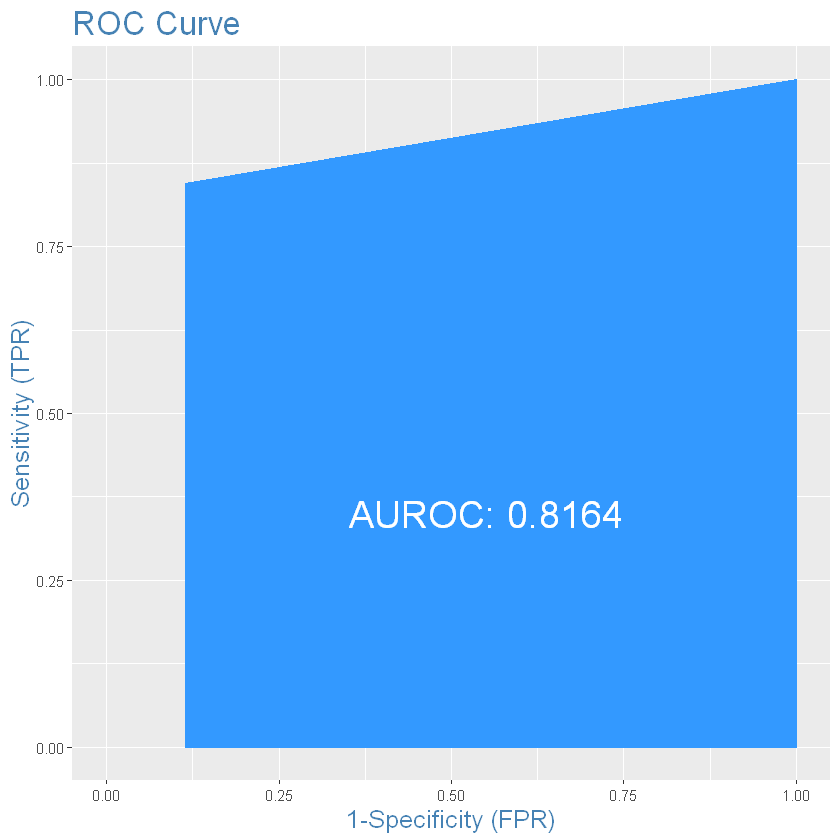

In [36]:
#find optimal threshold:
#for Classifier4
oc4 <- optimalCutoff(test_set$CardApproved, prob_predt4)[1] 
oc4

yp4 = ifelse(prob_predt4 > oc, 1, 0)

#roc.curve(test_set$CardApproved, yp4)
plotROC(test_set$CardApproved, yp4)


Thus, we can see the increase in Accuracy from classifier 3 to classifier 4.

After Logistic Regression, we use RandomForest Method.

In [92]:
RFTrain <-  data[c(16,1:13,15,17:21)] 
set.seed(1324)
splitRF = sample.split(RFTrain$CardApproved, SplitRatio = 0.75)
training_setRF = subset(RFTrain, splitRF == TRUE)
test_setRF = subset(RFTrain, splitRF == FALSE)


classifierRF = randomForest(x = training_setRF[-1],
                          y = training_setRF$CardApproved,
                          ntree = 70)

# Predicting the Training  set results
y_predRF = predict(classifierRF, newdata = training_setRF[-1])

# Making the Confusion Matrix
cmRF = table(training_setRF[, 1], y_predRF)
cmRF

   y_predRF
      0   1
  0 286   1
  1   0 230

In [93]:
# Predicting the Test set results
y_predtRF = predict(classifierRF, newdata = test_setRF[-1])

# Making the Confusion Matrix
cmtRF = table(test_setRF[, 1], y_predtRF)
cmtRF

   y_predtRF
     0  1
  0 89  7
  1 10 67

In [94]:
MisclassificationError_RF = (cmtRF[1,2]+cmtRF[2,1])/nrow(test_set)*100

MisclassificationError_RF

[1] 9.82659

Thus, we can see Random Forest has comparatively lesser misclassification error than Logistic Regression.